<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   OBS#                1000 non-null   int64
 1   DURATION            1000 non-null   int64
 2   NEW_CAR             1000 non-null   int64
 3   USED_CAR            1000 non-null   int64
 4   FURNITURE           1000 non-null   int64
 5   RADIO/TV            1000 non-null   int64
 6   EDUCATION           1000 non-null   int64
 7   RETRAINING          1000 non-null   int64
 8   AMOUNT              1000 non-null   int64
 9   INSTALL_RATE        1000 non-null   int64
 10  MALE_DIV            1000 non-null   int64
 11  MALE_SINGLE         1000 non-null   int64
 12  MALE_MAR_or_WID     1000 non-null   int64
 13  CO-APPLICANT        1000 non-null   int64
 14  GUARANTOR           1000 non-null   int64
 15  REAL_ESTATE         1000 non-null   int64
 16  PROP_UNKN_NONE      1000 non-null   int64
 

<Figure size 432x288 with 0 Axes>

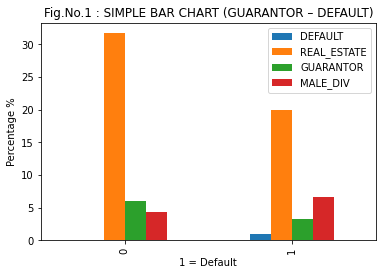

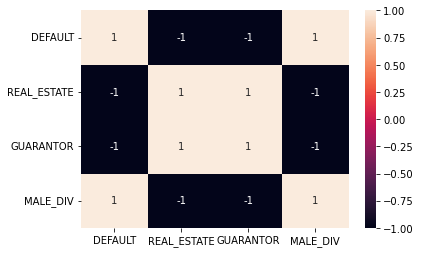

['DURATION', 'NUM_CREDITS', 'NUM_DEPENDENTS', 'NEW_CAR', 'AMOUNT', 'INSTALL_RATE', 'MALE_DIV', 'AGE', 'OTHER_INSTALL', 'REAL_ESTATE', 'GUARANTOR', 'MALE_DIV']
['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'CO-APPLICANT', 'EDUCATION', 'EMPLOYMENT_1', 'EMPLOYMENT_2', 'EMPLOYMENT_3', 'EMPLOYMENT_4', 'FOREIGN', 'FURNITURE', 'HISTORY_1', 'HISTORY_2', 'HISTORY_3', 'HISTORY_4', 'JOB_1', 'JOB_2', 'JOB_3', 'MALE_MAR_or_WID', 'MALE_SINGLE', 'OBS#', 'OWN_RES', 'PRESENT_RESIDENT_2', 'PRESENT_RESIDENT_3', 'PRESENT_RESIDENT_4', 'PROP_UNKN_NONE', 'RADIO/TV', 'RENT', 'RETRAINING', 'SAV_ACCT_1', 'SAV_ACCT_2', 'SAV_ACCT_3', 'SAV_ACCT_4', 'TELEPHONE', 'USED_CAR']
(800, 47)
(200, 47)

0    0.7
1    0.3
Name: DEFAULT, dtype: float64

0    0.7
1    0.3
Name: DEFAULT, dtype: float64
Log loss = 0.46813
AUC = 0.83333
Average Precision = 0.60779

Using 0.5 as threshold:
Accuracy = 0.76000
Precision = 0.64286
Recall = 0.45000
F1 score = 0.52941

Classification Report
              precision    recall  f1-score   su

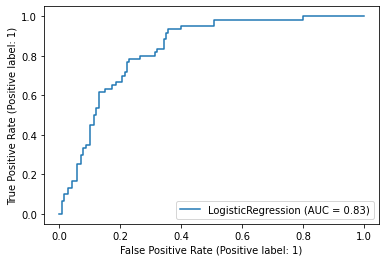

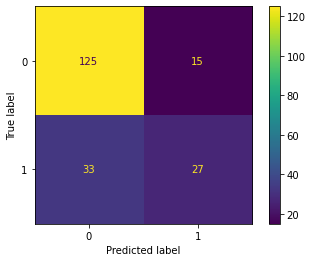

In [56]:
#### Credit Default Data
## Anil Niraula

#!pip install matplotlib.pyplot
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn #corr table
import io #pull csv from GitHub
#### Logit
## https://realpython.com/logistic-regression-python/
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#### Load credit data
#https://medium.com/towards-entrepreneurship/importing-a-csv-file-from-github-in-a-jupyter-notebook-e2c28e7e74a5

link = 'https://raw.githubusercontent.com/ANiraula/data_projects/main/Credit_Data.csv'
download =   requests.get(link).content
#req = requests.get('https://marketplace.spp.org/file-browser-api/download/generation-mix-historical?path=%2FGenMix_2020.csv', verify = False)
data = pd.read_csv(io.StringIO(download.decode('utf-8')))

## Look at the data

## Drop NAs
data = data.dropna().copy()

## Convert Categorical variables to Binary & drop original column
## with pd.get_dummies

data = pd.get_dummies(data, 
                      columns=['CHK_ACCT', 'HISTORY', 'SAV_ACCT', 'EMPLOYMENT', 'PRESENT_RESIDENT', 'JOB'], 
                      drop_first=True)
data.info()
### visualize categorical data correlation
##https://www.linkedin.com/posts/giannis-tolios_python-datascience-machinelearning-activity-6982716427732410369-s99v?utm_source=share&utm_medium=member_desktop

#################### EDA

data2 = data.groupby('DEFAULT')[['REAL_ESTATE', 'GUARANTOR', 'MALE_DIV']].mean()
## Multiply percentages by 100
data2[['REAL_ESTATE', 'GUARANTOR', 'MALE_DIV']]*=100
## Reset index to make column name visible
data2.reset_index(inplace=True)
## Round
data2 = round(data2, 1)
#data2

###### Visuzalize w/ Matplotlib
## https://pythonspot.com/matplotlib-bar-chart/
## https://digitaschools.com/data-visualization-in-python/

plt.figure(); data2.plot.bar(title='Fig.No.1 : SIMPLE BAR CHART (GUARANTOR – DEFAULT)'); plt.xlabel('1 = Default'); plt.ylabel('Percentage %') 
plt.show()

### Correlation matrix
corrMatrix = data2.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

#print (data.head())
data2['DEFAULT'].value_counts(dropna=False)

#################### Continue w/ Logistic Regresion

## Define numberic and Categorical (incl new dummies) variables
numeric_cols = ['DURATION', 'NUM_CREDITS', 'NUM_DEPENDENTS', 'NEW_CAR', 'AMOUNT', 'INSTALL_RATE', 'MALE_DIV', 'AGE', 'OTHER_INSTALL', 'REAL_ESTATE', 'GUARANTOR', 'MALE_DIV']
#cat_cols = ['CHK_ACCT', 'HISTORY', 'SAV_ACCT', 'EMPLOYMENT', 'PRESENT_RESIDENT', 'JOB']
cat_cols = list(set(data.columns) - set(numeric_cols) - {'DEFAULT'})
cat_cols.sort()
print(numeric_cols)
print(cat_cols)

##################
### Run logistic regression
### Using original data (without aggregated Mean)

## Split into Train & Test
## https://www.justintodata.com/logistic-regression-example-in-python/

random_seed = 900
data_train, data_test = train_test_split(data, test_size=0.2, random_state=random_seed, stratify=data['DEFAULT'])

print(data_train.shape)
print(data_test.shape)
print()
print(data_train['DEFAULT'].value_counts(normalize=True))
print()
print(data_test['DEFAULT'].value_counts(normalize=True))

list(data.columns)

######## Scale Numeric variables
scaler = StandardScaler()
scaler.fit(data_train[numeric_cols])

def get_features_and_target_arrays(data, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(data[numeric_cols])
    X_categorical = data[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = data['DEFAULT']
    return X, y

X, y = get_features_and_target_arrays(data_train, numeric_cols, cat_cols, scaler)

######## Fit the model
clf = LogisticRegression(max_iter=1000, solver = 'liblinear', penalty = 'l2') # logistic regression with no penalty term in the cost function.
clf.fit(X, y)


### ROC Curve
#Shows that AUC = 0.83, meaing model is 83% successful at correcly projecting Default rates & non-default rates
X_test, y_test = get_features_and_target_arrays(data_test, numeric_cols, cat_cols, scaler)
plot_roc_curve(clf, X_test, y_test)
###

### Predict
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)


####
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))


####
print('Confusion Matrix')
plot_confusion_matrix(clf, X_test, y_test)

#### Interpret results
## Exponentiating results to get odds
## np.exp

coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
x = pd.DataFrame(data={'variable': ['intercept'] + cat_cols + numeric_cols, 'coefficient': np.exp(coefficients)})
print(x)
y = pd.DataFrame(data={'variable': numeric_cols, 'unit': np.sqrt(scaler.var_)})
print(y)

#odds = np.exp(clf.coef_[0])
#For example, holding other variables fixed, there is a 40% increase in the odds of 
#defaulting on a loan for every standard deviation increase in 
#Installment rate as % of disposable income (1.103913).

#Client had 43% more odds in defaulting
##  for every standard deviation increase in 
#duration of the loan in months (12.220859)
